In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def get_llm(fn):
    llm = []
    for N in range(2,12):
        df = pd.read_csv('tsne.{}.csv'.format(N))
        df = df[df['fn']==fn]
        # llm.append((df['ILmr'] + df['DLmr'] + df['DLmw']).values[0])
        llm.append((df['DLmr'] + df['DLmw']).values[0])
    return llm

def get_tsne_baseline():
    fn = 'tsne_baseline'
    df = pd.read_csv('tsne_perf.csv')
    perf_df = df[['n', fn]]
    N = 2 ** df['n']
    perf_df['flop'] = 3228*N*N - 2304*N + 200
    perf_df['perf'] = perf_df['flop'] / perf_df[fn]
    perf_df['llm'] = get_llm(fn)
    perf_df['In'] = perf_df['flop'] / (64 * perf_df['llm'])
    return perf_df
    
def get_tsne(fn):
    df = pd.read_csv('tsne_perf.csv')
    perf_df = df[['n', fn]]
    N = 2 ** df['n']
    perf_df['flop'] = 2837.5*N*N - 345.5*N + 200
    perf_df['perf'] = perf_df['flop'] / perf_df[fn]
    perf_df['llm'] = get_llm(fn)
    perf_df['In'] = perf_df['flop'] / (64 * perf_df['llm'])
    return perf_df

In [3]:
v1 = get_tsne_baseline()
v2 = get_tsne('tsne_scalar')
v3 = get_tsne('tsne_vec')
v4 = get_tsne('tsne_vec3')

<ipython-input-2-f10007491451>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perf_df['flop'] = 3228*N*N - 2304*N + 200
<ipython-input-2-f10007491451>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perf_df['perf'] = perf_df['flop'] / perf_df[fn]
<ipython-input-2-f10007491451>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

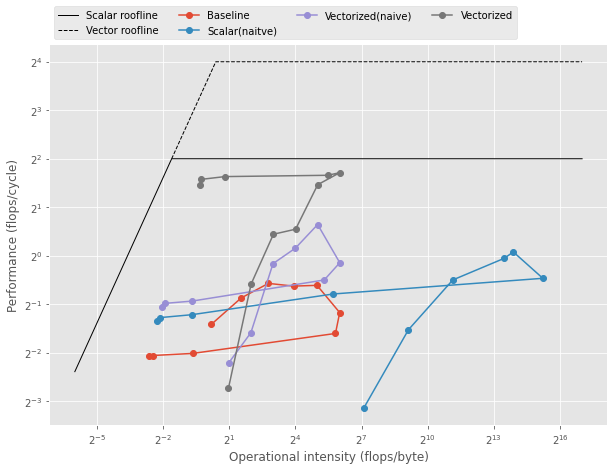

In [4]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10,7))
beta = 12.2 #bytes/cycle
ax.plot([1/64, 4/beta, 2**17], [beta/64, 4, 4], color='k', lw=1, label='Scalar roofline')
ax.plot([4/beta, 16/beta, 2**17], [4, 16, 16], color='k', lw=1, linestyle='--', label='Vector roofline')
ax.plot(v1['In'], v1['perf'], '-o', label='Baseline')
ax.plot(v2['In'], v2['perf'], '-o', label='Scalar(naitve)')
ax.plot(v3['In'], v3['perf'], '-o', label='Vectorized(naive)')
ax.plot(v4['In'], v4['perf'], '-o', label='Vectorized')
ax.set_xscale('log', base=2)
ax.set_yscale('log', base=2)
ax.set_xlabel('Operational intensity (flops/byte)')
ax.set_ylabel('Performance (flops/cycle)')
ax.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", ncol=4)

In [ ]:
fig.savefig('tsne_roofline.pdf', bbox_inches='tight')